## Import Libraries

In [301]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Import CSV file

In [302]:
credit = pd.read_csv('default of credit card clients.csv', header =1)

x

In [303]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [304]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [305]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [311]:
covMat = credit.iloc[1:10].cov()
print(covMat)

                                      ID     LIMIT_BAL           SEX  \
ID                          7.500000e+00  3.750000e+04     -0.500000   
LIMIT_BAL                   3.750000e+04  2.132778e+10 -15277.777778   
SEX                        -5.000000e-01 -1.527778e+04      0.277778   
EDUCATION                   7.500000e-01 -4.875000e+04      0.125000   
MARRIAGE                   -2.775558e-17  1.666667e+04     -0.041667   
AGE                        -4.750000e+00 -4.912500e+05     -2.750000   
PAY_0                      -3.750000e-01  3.597222e+04      0.152778   
PAY_2                      -2.250000e+00  2.805556e+04      0.194444   
PAY_3                      -3.750000e-01  4.236111e+04      0.263889   
PAY_4                      -1.000000e+00  2.611111e+04      0.138889   
PAY_5                      -5.000000e-01  1.305556e+04      0.069444   
PAY_6                      -1.750000e+00  1.500000e+04      0.125000   
BILL_AMT1                   2.806625e+04  1.601546e+10 -24953.08

## Transformation of Data

In [312]:
credit["SEX"] = credit["SEX"].astype("category")
credit["EDUCATION"] = credit["EDUCATION"].astype("category")
credit["MARRIAGE"] = credit["MARRIAGE"].astype("category")
credit["PAY_0"] = credit["PAY_0"].astype("category")
credit["PAY_2"] = credit["PAY_2"].astype("category")
credit["PAY_3"] = credit["PAY_3"].astype("category")
credit["PAY_4"] = credit["PAY_4"].astype("category")
credit["PAY_5"] = credit["PAY_5"].astype("category")
credit["PAY_6"] = credit["PAY_6"].astype("category")



In [313]:
credit = credit[(credit[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 
             'PAY_AMT1','PAY_AMT2', 'PAY_AMT3',
             'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']] != 0).all(axis=1)]

In [314]:
credit["SEX"].replace(to_replace=1, value='male', inplace=True)
credit["SEX"].replace(to_replace=2, value='female', inplace=True)

credit["EDUCATION"].replace(to_replace=1, value='graduate school', inplace=True)
credit["EDUCATION"].replace(to_replace=2, value='university', inplace=True)
credit["EDUCATION"].replace(to_replace=3, value='high school', inplace=True)

credit["EDUCATION"].replace(to_replace=0, value='others', inplace=True)
credit["EDUCATION"].replace(to_replace=4, value='others', inplace=True)
credit["EDUCATION"].replace(to_replace=5, value='others', inplace=True)
credit["EDUCATION"].replace(to_replace=6, value='others', inplace=True)

credit["MARRIAGE"].replace(to_replace=1, value='married', inplace=True)
credit["MARRIAGE"].replace(to_replace=2, value='single', inplace=True)
credit["MARRIAGE"].replace(to_replace=3, value='divorce', inplace=True)
credit["MARRIAGE"].replace(to_replace=0, value='others', inplace=True)

credit["PAY_0"].replace(to_replace=-2, value='No consumption', inplace=True)
credit["PAY_0"].replace(to_replace=-1, value='Paid in full', inplace=True)
credit["PAY_0"].replace(to_replace=0, value='The use of revolving credit', inplace=True)
credit["PAY_0"].replace(to_replace=1, value=' payment delay for one month', inplace=True)
credit["PAY_0"].replace(to_replace=2, value=' payment delay for two months', inplace=True)
credit["PAY_0"].replace(to_replace=3, value=' payment delay for three months', inplace=True)
credit["PAY_0"].replace(to_replace=4, value=' payment delay for four months', inplace=True)
credit["PAY_0"].replace(to_replace=5, value=' payment delay for five months', inplace=True)
credit["PAY_0"].replace(to_replace=6, value=' payment delay for six months', inplace=True)
credit["PAY_0"].replace(to_replace=7, value=' payment delay for seven months', inplace=True)
credit["PAY_0"].replace(to_replace=8, value=' payment delay for eight months', inplace=True)
credit["PAY_0"].replace(to_replace=9, value=' payment delay for nine months', inplace=True)

credit["PAY_2"].replace(to_replace=-2, value='No consumption', inplace=True)
credit["PAY_2"].replace(to_replace=-1, value='Paid in full', inplace=True)
credit["PAY_2"].replace(to_replace=0, value='The use of revolving credit', inplace=True)
credit["PAY_2"].replace(to_replace=1, value=' payment delay for one month', inplace=True)
credit["PAY_2"].replace(to_replace=2, value=' payment delay for two months', inplace=True)
credit["PAY_2"].replace(to_replace=3, value=' payment delay for three months', inplace=True)
credit["PAY_2"].replace(to_replace=4, value=' payment delay for four months', inplace=True)
credit["PAY_2"].replace(to_replace=5, value=' payment delay for five months', inplace=True)
credit["PAY_2"].replace(to_replace=6, value=' payment delay for six months', inplace=True)
credit["PAY_2"].replace(to_replace=7, value=' payment delay for seven months', inplace=True)
credit["PAY_2"].replace(to_replace=8, value=' payment delay for eight months', inplace=True)
credit["PAY_2"].replace(to_replace=9, value=' payment delay for nine months', inplace=True)

credit["PAY_3"].replace(to_replace=-2, value='No consumption', inplace=True)
credit["PAY_3"].replace(to_replace=-1, value='Paid in full', inplace=True)
credit["PAY_3"].replace(to_replace=0, value='The use of revolving credit', inplace=True)
credit["PAY_3"].replace(to_replace=1, value=' payment delay for one month', inplace=True)
credit["PAY_3"].replace(to_replace=2, value=' payment delay for two months', inplace=True)
credit["PAY_3"].replace(to_replace=3, value=' payment delay for three months', inplace=True)
credit["PAY_3"].replace(to_replace=4, value=' payment delay for four months', inplace=True)
credit["PAY_3"].replace(to_replace=5, value=' payment delay for five months', inplace=True)
credit["PAY_3"].replace(to_replace=6, value=' payment delay for six months', inplace=True)
credit["PAY_3"].replace(to_replace=7, value=' payment delay for seven months', inplace=True)
credit["PAY_3"].replace(to_replace=8, value=' payment delay for eight months', inplace=True)
credit["PAY_3"].replace(to_replace=9, value=' payment delay for nine months', inplace=True)

credit["PAY_4"].replace(to_replace=-2, value='No consumption', inplace=True)
credit["PAY_4"].replace(to_replace=-1, value='Paid in full', inplace=True)
credit["PAY_4"].replace(to_replace=0, value='The use of revolving credit', inplace=True)
credit["PAY_4"].replace(to_replace=1, value=' payment delay for one month', inplace=True)
credit["PAY_4"].replace(to_replace=2, value=' payment delay for two months', inplace=True)
credit["PAY_4"].replace(to_replace=3, value=' payment delay for three months', inplace=True)
credit["PAY_4"].replace(to_replace=4, value=' payment delay for four months', inplace=True)
credit["PAY_4"].replace(to_replace=5, value=' payment delay for five months', inplace=True)
credit["PAY_4"].replace(to_replace=6, value=' payment delay for six months', inplace=True)
credit["PAY_4"].replace(to_replace=7, value=' payment delay for seven months', inplace=True)
credit["PAY_4"].replace(to_replace=8, value=' payment delay for eight months', inplace=True)
credit["PAY_4"].replace(to_replace=9, value=' payment delay for nine months', inplace=True)

credit["PAY_5"].replace(to_replace=-2, value='No consumption', inplace=True)
credit["PAY_5"].replace(to_replace=-1, value='Paid in full', inplace=True)
credit["PAY_5"].replace(to_replace=0, value='The use of revolving credit', inplace=True)
credit["PAY_5"].replace(to_replace=1, value=' payment delay for one month', inplace=True)
credit["PAY_5"].replace(to_replace=2, value=' payment delay for two months', inplace=True)
credit["PAY_5"].replace(to_replace=3, value=' payment delay for three months', inplace=True)
credit["PAY_5"].replace(to_replace=4, value=' payment delay for four months', inplace=True)
credit["PAY_5"].replace(to_replace=5, value=' payment delay for five months', inplace=True)
credit["PAY_5"].replace(to_replace=6, value=' payment delay for six months', inplace=True)
credit["PAY_5"].replace(to_replace=7, value=' payment delay for seven months', inplace=True)
credit["PAY_5"].replace(to_replace=8, value=' payment delay for eight months', inplace=True)
credit["PAY_5"].replace(to_replace=9, value=' payment delay for nine months', inplace=True)

credit["PAY_6"].replace(to_replace=-2, value='No consumption', inplace=True)
credit["PAY_6"].replace(to_replace=-1, value='Paid in full', inplace=True)
credit["PAY_6"].replace(to_replace=0, value='The use of revolving credit', inplace=True)
credit["PAY_6"].replace(to_replace=1, value=' payment delay for one month', inplace=True)
credit["PAY_6"].replace(to_replace=2, value=' payment delay for two months', inplace=True)
credit["PAY_6"].replace(to_replace=3, value=' payment delay for three months', inplace=True)
credit["PAY_6"].replace(to_replace=4, value=' payment delay for four months', inplace=True)
credit["PAY_6"].replace(to_replace=5, value=' payment delay for five months', inplace=True)
credit["PAY_6"].replace(to_replace=6, value=' payment delay for six months', inplace=True)
credit["PAY_6"].replace(to_replace=7, value=' payment delay for seven months', inplace=True)
credit["PAY_6"].replace(to_replace=8, value=' payment delay for eight months', inplace=True)
credit["PAY_6"].replace(to_replace=9, value=' payment delay for nine months', inplace=True)


## Analysis

### Number of people per gender

In [315]:
credit.groupby('SEX')['SEX'].count()

SEX
female    9231
male      6105
Name: SEX, dtype: int64

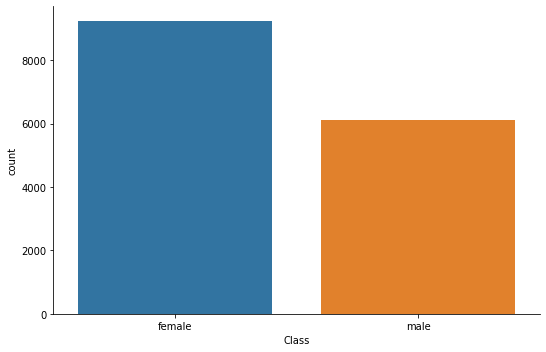

In [316]:
fg = sns.factorplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Class')

### Number of people per education level

In [317]:
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
graduate school    5252
high school        2463
others              259
university         7362
Name: EDUCATION, dtype: int64

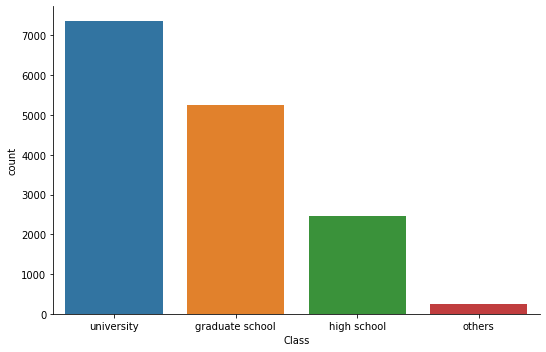

In [318]:
fg = sns.factorplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Class')

### Number of people per gender and education level

In [319]:
credit.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX     EDUCATION      
female  graduate school    3002
        high school        1476
        others              171
        university         4582
male    graduate school    2250
        high school         987
        others               88
        university         2780
Name: SEX, dtype: int64

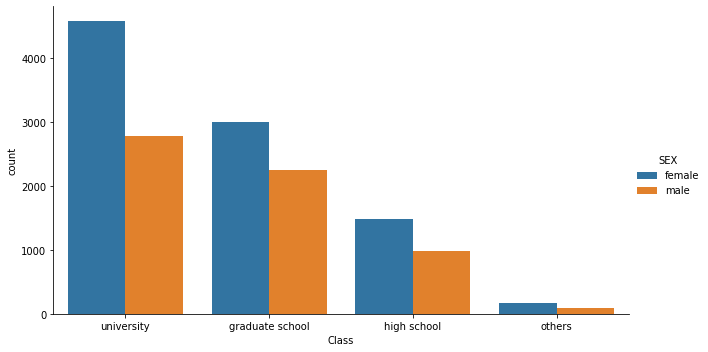

In [320]:
g = sns.factorplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Class')

### Number of people who have default payment grouped by gender and education level

In [321]:
credit.pivot_table('default payment next month', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,graduate school,high school,others,university,All
SEX,,,,,
female,315,221,9,649,1194
male,286,172,7,479,944
All,601,393,16,1128,2138


In [322]:
not_default = credit[credit['default payment next month']==0]

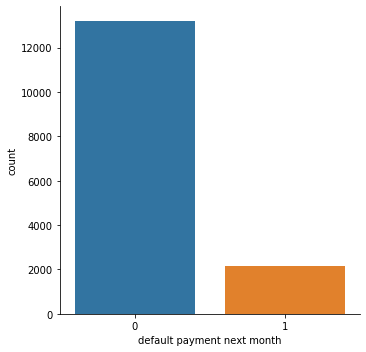

In [323]:
sns.factorplot('default payment next month', data=credit, kind='count')

### Number of people who have not default payment 

In [324]:
len(not_default)

13198

### Number of people who have not default payment grouped by gender and education level

In [325]:
not_default.pivot_table('default payment next month', 'SEX', 'EDUCATION', aggfunc=len, margins=True)

EDUCATION,graduate school,high school,others,university,All
SEX,,,,,
female,2687,1255,162,3933,8037
male,1964,815,81,2301,5161
All,4651,2070,243,6234,13198


### Number of people per education level and marriage status

In [326]:
table = pd.crosstab(index=[credit['default payment next month'],credit.EDUCATION], columns=[credit.SEX,credit.MARRIAGE])

In [327]:
table.unstack()

SEX                                 female                                \
MARRIAGE                           divorce                                 
EDUCATION                  graduate school high school others university   
default payment next month                                                 
0                                        5          29      5         45   
1                                        1           3      0         10   

SEX                                                                       \
MARRIAGE                           married                                 
EDUCATION                  graduate school high school others university   
default payment next month                                                 
0                                      812         755     85       2020   
1                                      104         143      3        343   

SEX                                                     ...    male  \
MARRIAGE                            others              ... married   
EDUCATION                  graduate school high school  ...  others   
default payment next month                              ...           
0                                        2          11  ...      46   
1                                        0           1  ...       7   

SEX                                                                       \
MARRIAGE                                       others                      
EDUCATION                  university graduate school high school others   
default payment next month                                                 
0                                1053               0           4      0   
1                                 225               0           1      0   

SEX                                                                       \
MARRIAGE                                       single                      
EDUCATION                  university graduate school high school others   
default payment next month                                                 
0                                   0            1213         380     35   
1                                   0             152          73      0   

SEX                                    
MARRIAGE                               
EDUCATION                  university  
default payment next month             
0                                1222  
1                                 244  

[2 rows x 32 columns]

In [328]:
table.columns, table.index

(MultiIndex(levels=[['female', 'male'], ['divorce', 'married', 'others', 'single']],
            codes=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3]],
            names=['SEX', 'MARRIAGE']),
 MultiIndex(levels=[[0, 1], ['graduate school', 'high school', 'others', 'university']],
            codes=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3]],
            names=['default payment next month', 'EDUCATION']))

### Analysis of clients age

#### Average and median age of clients

In [329]:
print('Average and median age of clients are %0.f and %0.f years old, respectively'%(credit.AGE.mean(), 
                                                                          credit.AGE.median()))

Average and median age of clients are 36 and 34 years old, respectively


In [330]:
credit.AGE.describe()

count    15336.000000
mean        35.581638
std          9.122325
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [331]:
age = credit['AGE'].dropna()

#### Distribution of age, with an overlay of a density plot

Text(0.5, 1.0, "Distribution of Clients' Ages")

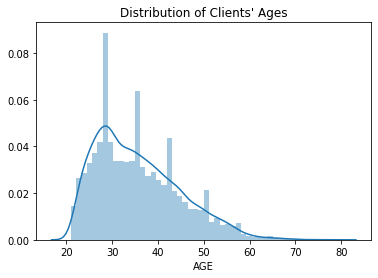

In [332]:
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Clients' Ages")

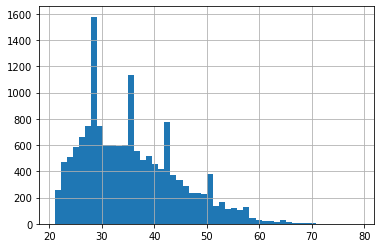

In [333]:
credit['AGE'].hist(bins=50)

#### Function defining those who are ederly

In [334]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age > 60:
        return 'ederly'
    else:
        return sex

Creating a new attribute based on that function

In [335]:
credit['person'] = credit[['AGE', 'SEX']].apply(male_female_child, axis=1)

In [336]:
credit[:10]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,person
2,3,90000,female,university,single,34,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,14948,15549,1518,1500,1000,1000,1000,5000,0,female
3,4,50000,female,university,married,37,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,28959,29547,2000,2019,1200,1100,1069,1000,0,female
4,5,50000,male,university,married,57,Paid in full,The use of revolving credit,Paid in full,The use of revolving credit,...,19146,19131,2000,36681,10000,9000,689,679,0,male
5,6,50000,male,graduate school,single,37,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,19619,20024,2500,1815,657,1000,1000,800,0,male
6,7,500000,male,graduate school,single,29,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,483003,473944,55000,40000,38000,20239,13750,13770,0,male
10,11,200000,female,high school,single,34,The use of revolving credit,The use of revolving credit,payment delay for two months,The use of revolving credit,...,1828,3731,2306,12,50,300,3738,66,0,female
14,15,250000,male,graduate school,single,29,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,56875,55512,3000,3000,3000,3000,3000,3000,0,male
17,18,320000,male,graduate school,married,49,The use of revolving credit,The use of revolving credit,The use of revolving credit,Paid in full,...,5856,195599,10358,10000,75940,20000,195599,50000,0,male
20,21,130000,female,high school,single,39,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,11802,930,3000,1537,1000,2000,930,33764,0,female
25,26,50000,male,high school,single,23,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,29829,30046,1973,1426,1001,1432,1062,997,0,male


### Distribution of Age Grouped by Gender

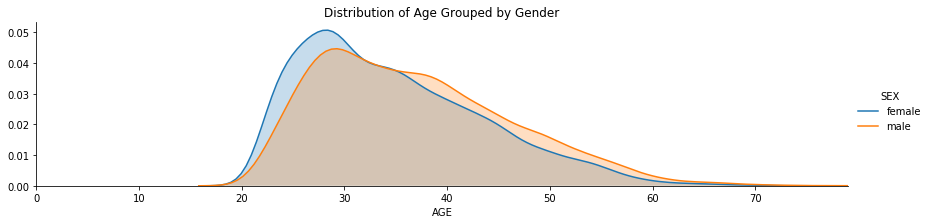

In [337]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

### Distribution of Age Grouped by property 'Person'

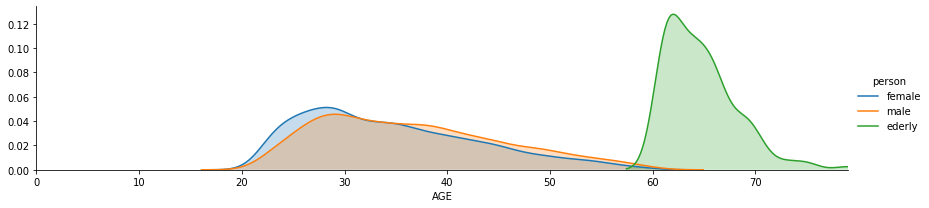

In [338]:
fig = sns.FacetGrid(credit, hue='person', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### Distribution of Age Grouped by Education Level

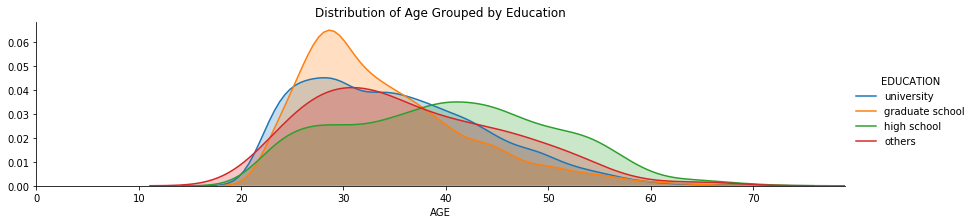

In [339]:
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Education')
fig.add_legend()

### Distribution of Gender Grouped by Education Level

In [340]:
creditEducationSex = pd.crosstab(index=[credit.EDUCATION], columns=[credit.SEX])

In [341]:
creditEducationSex

SEX,female,male
EDUCATION,,
graduate school,3002,2250
high school,1476,987
others,171,88
university,4582,2780


In [342]:
creditEducationSex.index

Index(['graduate school', 'high school', 'others', 'university'], dtype='object', name='EDUCATION')

In [343]:
creditEducationSex.columns

Index(['female', 'male'], dtype='object', name='SEX')

### Factors Affecting the Credit Payment

In [344]:
credit['payment'] = credit['default payment next month'].map({0:'no', 1:'yes'})

In [345]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,person,payment
2,3,90000,female,university,single,34,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,15549,1518,1500,1000,1000,1000,5000,0,female,no
3,4,50000,female,university,married,37,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,29547,2000,2019,1200,1100,1069,1000,0,female,no
4,5,50000,male,university,married,57,Paid in full,The use of revolving credit,Paid in full,The use of revolving credit,...,19131,2000,36681,10000,9000,689,679,0,male,no
5,6,50000,male,graduate school,single,37,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,20024,2500,1815,657,1000,1000,800,0,male,no
6,7,500000,male,graduate school,single,29,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,473944,55000,40000,38000,20239,13750,13770,0,male,no


### Linear Plot of Limit Balance vs default payment

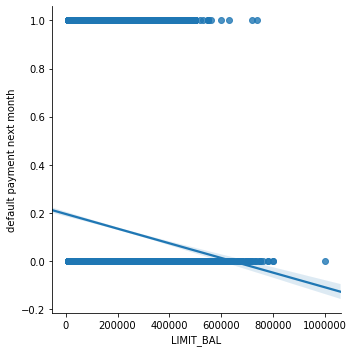

In [346]:
sns.lmplot('LIMIT_BAL', 'default payment next month', data=credit)

### Linear Plot of Age, Gender vs default payment

We can see that age distribution do not differ very much, but in addition to this we can see there are more tendency to default payment in male than female.

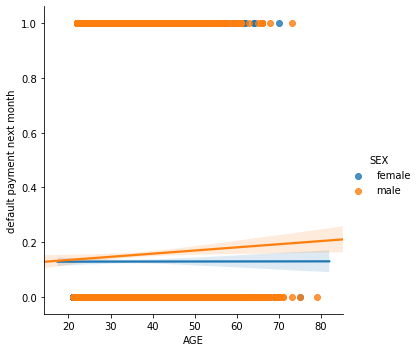

In [347]:
sns.lmplot('AGE', 'default payment next month', data=credit, hue='SEX')

### Linear Plot of Age, Education vs default payment

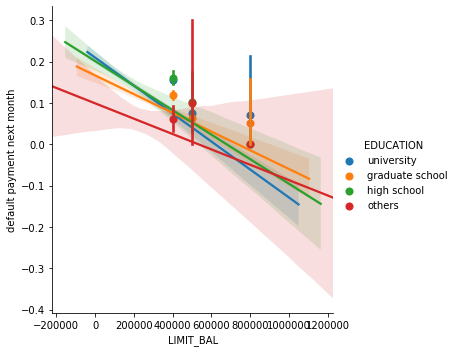

In [348]:
sns.lmplot('LIMIT_BAL','default payment next month',hue='EDUCATION',data=credit,x_bins=generations)

#### Linear Plot of Marriage Status vs default payment

In divorced people there is a higher rate to default payment.

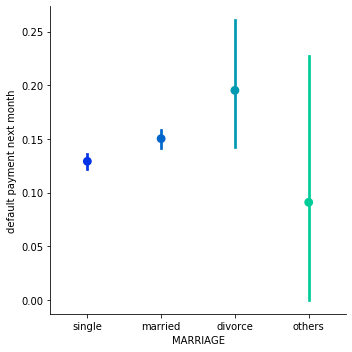

In [349]:
sns.factorplot('MARRIAGE', 'default payment next month', data=credit, palette='winter') 